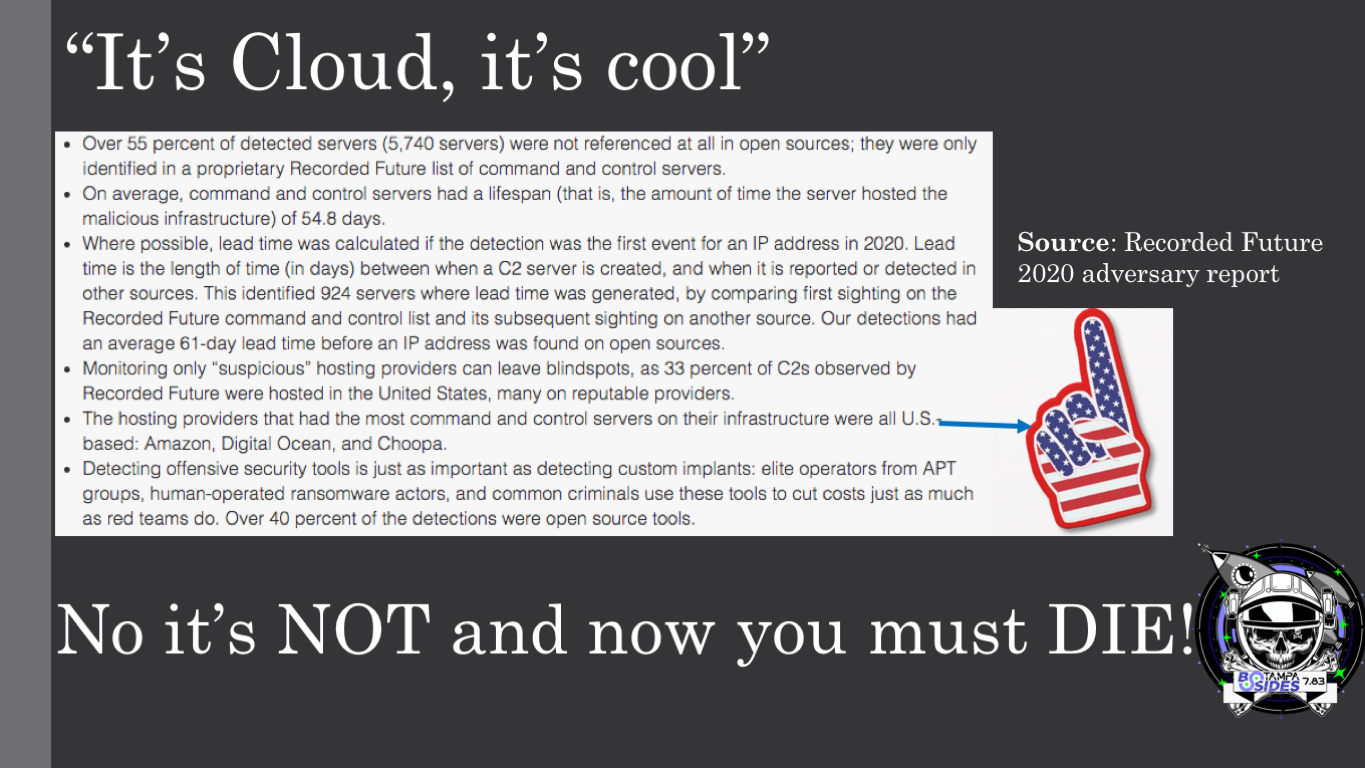

In [247]:
from IPython.display import Image
Image("slide4.png",width=1000)

In [2]:
import requests
import pandas as pd
import json

In [3]:
# Suppress SSL warning
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

In [280]:
import io
from netaddr import IPAddress 
from netaddr import IPNetwork
#endpoint = 'https://raw.githubusercontent.com/firehol/blocklist-ipsets/master/bambenek_c2.ipset' # <-- Known C2 Sites
#endpoint = 'https://iplists.firehol.org/files/firehol_level1.netset' # <-- Level 1 Network Abusers
#endpoint = 'https://iplists.firehol.org/files/firehol_abusers_1d.netset' # <-- Last 24 Hrs
endpoint = 'https://iplists.firehol.org/files/firehol_webserver.netset' # <-- Known bad webserver IPs and Blocks
#endpoint = 'https://raw.githubusercontent.com/firehol/blocklist-ipsets/master/bi_bruteforce_0_1d.ipset'
#endpoint = 'https://raw.githubusercontent.com/firehol/blocklist-ipsets/master/alienvault_reputation.ipset'

octet=1
r = requests.get(endpoint,  verify=False).content
data = pd.read_csv(io.StringIO(r.decode('utf-8')),names=["CIDR"])
df = data[~data['CIDR'].str.contains('#')]
df
#pd.set_option('display.max_rows', None)
#fcidr = df.loc[:,'CIDR'].str.rsplit(pat='.',n=octet,expand=True,)[0] # < -- Count by /24 CIDR block
#fcidr.value_counts() # <--- Get count by CIDR block 
#block = pd.DataFrame(fcidr)
#block

In [249]:
############# AWS EC2 CIDR BLOCKS #########################################
awsData = pd.read_csv(r'/Users/johnsmith/notebooks/awsCidrs.csv',names="A")
awsCidr = awsData.loc[:,'A'].str.rsplit(pat='.',n=1,expand=True)[0] # < -- Count by /24 CIDR block
#awsCidr

In [251]:
########### Digital Ocean CIDR BLOCKS #####################################
doData = pd.read_csv(r'/Users/johnsmith/notebooks/docidrs.csv',names="A")
doCidr = doData.loc[:,'A'].str.rsplit(pat='.',n=1,expand=True)[0] # < -- Count by /24 CIDR block
#doCidr

In [254]:
########## Google Cloud CIDR BLOCKS #######################################
googleData = pd.read_csv(r'/Users/johnsmith/notebooks/gCloudcidrs.csv',names="A")
googleCidr = googleData.loc[:,'A'].str.rsplit(pat='.',n=1,expand=True)[0] # < -- Count by /24 CIDR block
#googleCidr

In [281]:
#joined_ips=pd.merge(block,awsData, right_on=awsCidr, left_on=fcidr) # <---Check AWS
#joined_ips=pd.merge(block,doData, right_on=doCidr, left_on=fcidr) # <---Check Digital Ocean
#joined_ips=pd.merge(block,googleData, right_on=googleCidr, left_on=fcidr) # <--- Check Google
joined_df = joined_ips.drop_duplicates()
joined_df
#joined_df.groupby([0,'key_0']).size()